Boom the News
a fake news detedtor 

In [15]:
print("fake news detedtor")

fake news detedtor


here we start

imports

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

read Data from csv file for process

In [17]:
data = pd.read_csv('News.csv',index_col=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


getting size of data

In [18]:
data.shape

(44919, 5)

As there is no any requirment title, subject ,date for detecting fake news

In [19]:
data = data.drop(['title','subject','date'],axis=1)
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


if there is any NULL value in the text data then we will have to remove that data

In [20]:
data.isnull().sum()

text     0
class    0
dtype: int64

Suffling the text data but doing in same data

In [21]:
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)
data.head()

,text,class
0,BERLIN (Reuters) - German Finance Minister Wol...,1
1,"In fly-over country, and pretty much anywhere ...",0
2,Right after Ted Cruz suspended his presidentia...,0
3,Harney County resident Jarvis Kennedy has a me...,0
4,The president says he doesn t think Obamacare ...,0


Analysing the data

1. plotting how many fake and real news are in data

<Axes: xlabel='class', ylabel='count'>

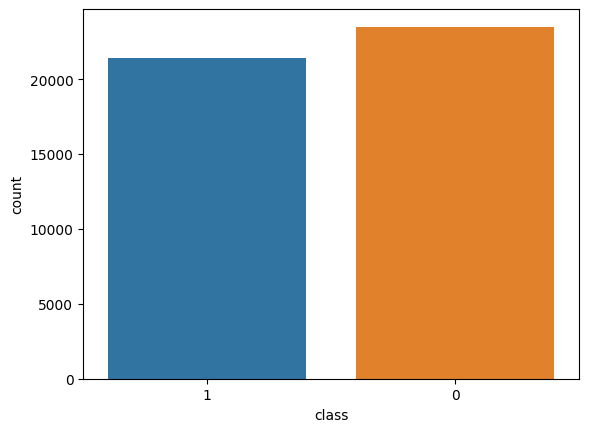

In [22]:

sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index[::-1]
              )

2. we will work on word distribution on the basis of that we can detect the news

In [23]:
# pip install wordcloud


from tqdm import tqdm:

tqdm is a library that provides a progress bar for iterating over sequences like lists, tuples, etc. It's often used to visualize the progress of loops or operations that take some time to complete. This is particularly useful when working with large datasets or long-running processes.
import re:

re stands for "regular expressions". It's a built-in Python module that provides support for working with regular expressions. Regular expressions are a powerful tool for pattern matching and text manipulation. They're used to find, replace, or manipulate strings based on specific patterns.
import nltk:

nltk stands for "Natural Language Toolkit". It's a popular library for working with human language data (text data) in Python. It provides tools for text processing, tokenization, stemming, tagging, parsing, and more.
nltk.download('punkt'):

This line is downloading the punkt resource from NLTK. The punkt resource includes a pre-trained model for tokenization. Tokenization is the process of splitting a text into individual words or tokens.
nltk.download('stopwords'):

This line is downloading the stopwords resource from NLTK. Stopwords are common words that are often removed from text during text processing because they typically don't carry significant meaning in a specific context. For example, words like "the", "and", "is", etc.
from nltk.corpus import stopwords:

This imports the stopwords corpus from the NLTK library. The stopwords corpus contains lists of common stopwords in various languages. It's often used in text preprocessing to remove these words from text data.
from nltk.tokenize import word_tokenize:

This imports the word_tokenize function from the NLTK library. The word_tokenize function is used to tokenize a text string into individual words or tokens.
from nltk.stem.porter import PorterStemmer:

This imports the PorterStemmer class from the NLTK library. A stemmer is a tool used to reduce words to their root or base form. The Porter stemmer is a popular stemming algorithm.
from wordcloud import WordCloud:

The WordCloud class is part of the wordcloud library. It's used to create word clouds, which are graphical representations of word frequency in a given text. Word clouds are often used for visualizing the most common words in a text corpus.


In [24]:
# for sowing progress bar for large dataset access
from tqdm import tqdm
# re stands for regular expression this work on pattern matching and expression matching
import re
# nltk stands for natural language toolkit it is popular toolkit for working on human language
import nltk
# this is for downloading Punkt resorce from nltk it helps to it is pre trained dataset which help to tokenized text data 
nltk.download('punkt')

# this stopwords is usefull for removing meaning less words like the a and is are 
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
# for visualization of text data 
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msriz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msriz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


creating function for processing text data like we are taking text data and tokeizing those and removing all non-alphabetical text white space and other things

In [25]:
def preprocess_text(text_data):
	preprocessed_text = []
	
	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text


storing those processed data into text_data

In [26]:
print(len(data['text'].values))

44919


In [27]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review
print(data['text'])

100%|██████████| 44919/44919 [43:17<00:00, 17.29it/s]  

0        berlin reuters german finance minister wolfgan...
1        in flyover country pretty much anywhere east w...
2        right ted cruz suspended presidential campaign...
3        harney county resident jarvis kennedy message ...
4        the president says think obamacare going anywh...
                               ...                        
44914    donald trump woke sunday morning decided play ...
44915    the clampetts as usual responsible gun owning ...
44916    london reuters british police chasing people s...
44917    geneva reuters us president donald trump criti...
44918    pittsburgh steelers players absent sideline re...
Name: text, Length: 44919, dtype: object


storing processed data into csv file

In [28]:
data.to_csv('processedNews.csv', index=False)
print(data['class'])


0        1
1        0
2        0
3        0
4        0
        ..
44914    0
44915    0
44916    1
44917    1
44918    0
Name: class, Length: 44919, dtype: int64


reading data from processed news

In [29]:
data = pd.read_csv('processedNews.csv')
# data.head()
print(data['text'])
# for word in data['']:
#     print(word)

0        berlin reuters german finance minister wolfgan...
1        in flyover country pretty much anywhere east w...
2        right ted cruz suspended presidential campaign...
3        harney county resident jarvis kennedy message ...
4        the president says think obamacare going anywh...
                               ...                        
44914    donald trump woke sunday morning decided play ...
44915    the clampetts as usual responsible gun owning ...
44916    london reuters british police chasing people s...
44917    geneva reuters us president donald trump criti...
44918    pittsburgh steelers players absent sideline re...
Name: text, Length: 44919, dtype: object


suffling the data

In [30]:
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)
data.head()

,text,class
0,washington reuters about 10000 retired coal mi...,1
1,new delhi reuters a dozen arab ambassadors ask...,1
2,manila reuters rescuers philippines searched s...,1
3,mike webb conservative christian running offic...,0
4,just everyone thought crazy fat kid get crazie...,0


visualization of word cloud
for real news

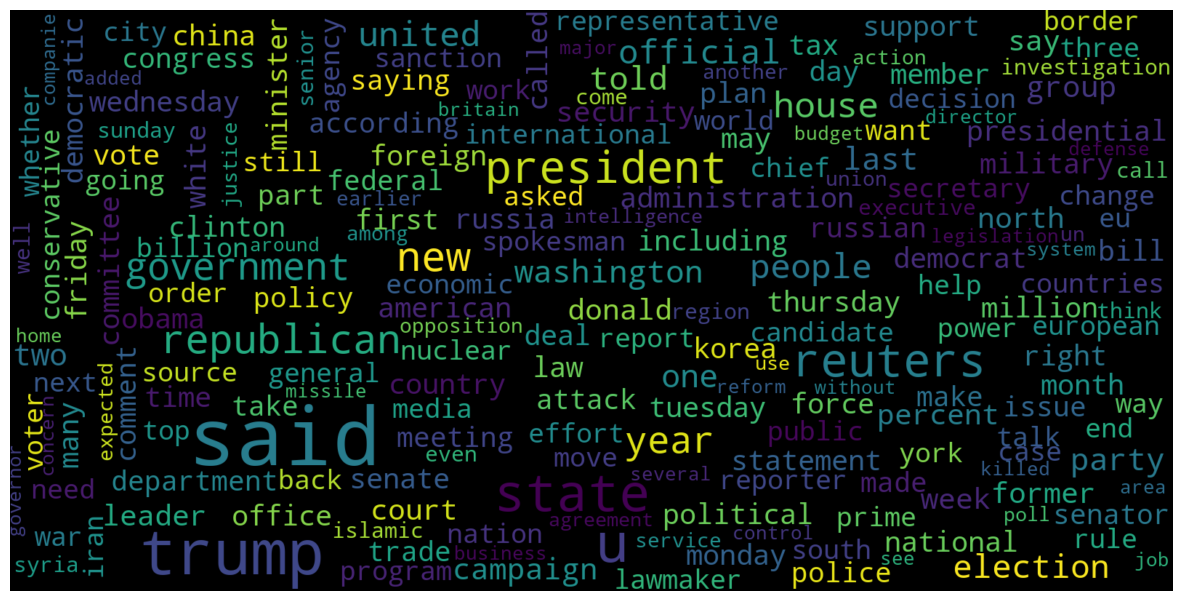

In [31]:
# Real
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


Visualozation of words in fake news

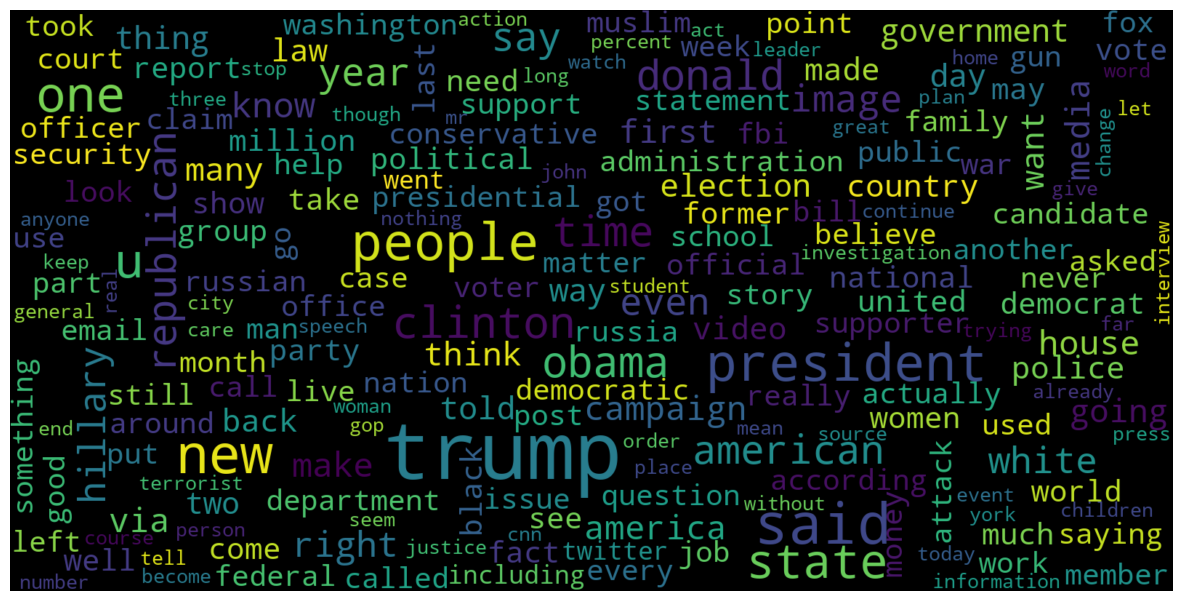

In [32]:
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

Getting most frequent used words

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

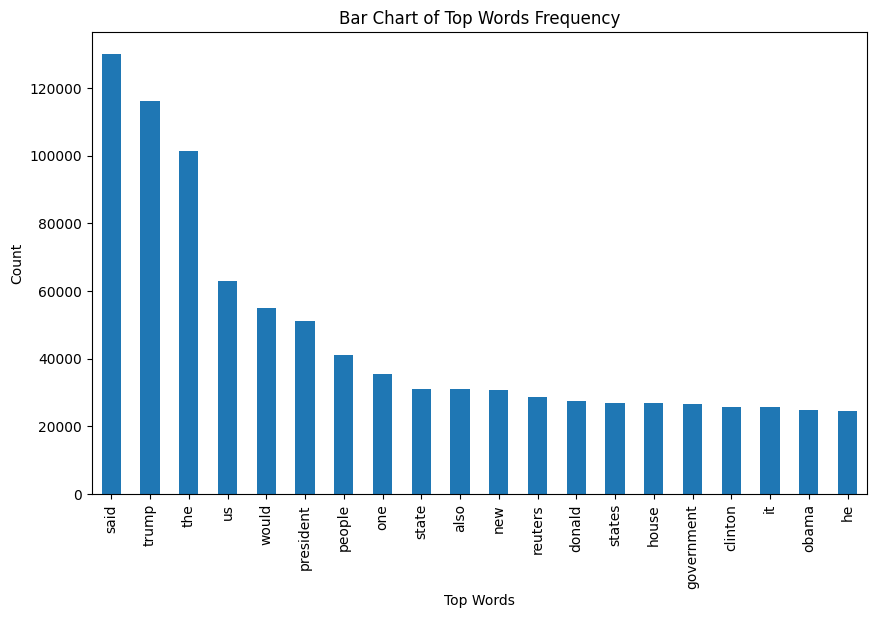

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
# import pandas as pd

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                 for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]

# Assuming 'data' is a pandas DataFrame with a 'text' column containing the text data
# Drop rows with NaN values in the 'text' column
data.dropna(subset=['text'], inplace=True)

common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)


splitting data into training set and testing set with 25%

In [34]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
  
x_train, x_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['class'], 
                                                 test_size=0.25)
print(x_train)
print(type(x_train))
print(type(x_test))

21075    on september 6 2017 liberal media elites belie...
9944     donald trump misogynist we know now gop cronie...
31042    beijing reuters indian foreign secretary subra...
20045    cnn chris cuomo tried discussion police brutal...
17677    seoul reuters south korea immediately start ta...
                               ...                        
14827    singapore reuters the united states encouraged...
11250    remember first question reporters asked player...
11057    ankara reuters turkey banking regulator urged ...
4117     washington reuters president donald trump orde...
10427    london reuters scotland wales proposed changes...
Name: text, Length: 33216, dtype: object
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


storing these training data 

Converting training data into vector usig tfvetariser

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming x_train and x_test are your training and test data

# Remove or impute missing values
x_train.dropna(inplace=True)
x_test.dropna(inplace=True)

# Convert NaN values to empty strings
x_train.fillna("", inplace=True)
x_test.fillna("", inplace=True)

# Create a TfidfVectorizer
vectorization = TfidfVectorizer()

# Vectorize the training and test data
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

print(type(xv_test))


<class 'scipy.sparse._csr.csr_matrix'>


Modeling

first modeling using Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report 
  
LR = LogisticRegression()  
LR.fit(xv_train,y_train)  

LogisticRegression()

saving this training model

In [37]:
import joblib

# To save
joblib.dump(LR, 'trained_model_LR.pkl')

# To load


['trained_model_LR.pkl']

testing

In [38]:

pred_lr=LR.predict(xv_test)  
LR.score(xv_test, y_test)  

0.990606936416185

In [39]:
loaded_LR = joblib.load('trained_model_LR.pkl')
pred_lr2 = loaded_LR.predict(xv_test)
loaded_LR.score(xv_test, y_test) 

0.990606936416185

In [40]:
print(classification_report(y_test, pred_lr)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5795
           1       0.99      0.99      0.99      5277

    accuracy                           0.99     11072
   macro avg       0.99      0.99      0.99     11072
weighted avg       0.99      0.99      0.99     11072



In [41]:
print(classification_report(y_test, pred_lr2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5795
           1       0.99      0.99      0.99      5277

    accuracy                           0.99     11072
   macro avg       0.99      0.99      0.99     11072
weighted avg       0.99      0.99      0.99     11072



2nd model Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier  
  
  
DT = DecisionTreeClassifier()  
DT.fit(xv_train, y_train)  

DecisionTreeClassifier()

saving this model for future 

In [43]:
joblib.dump(LR, 'trained_model_DT.pkl')



['trained_model_DT.pkl']

The accuracy Decision Tree Classifier is around 99% which is almost close to perfect.

In [44]:
pred_dt = DT.predict(xv_test)  
DT.score(xv_test, y_test)

0.9954841040462428

In [45]:
# To load
loaded_DT = joblib.load('trained_model_DT.pkl')
pred_dt2 = loaded_DT.predict(xv_test)  
loaded_DT.score(xv_test, y_test)

0.990606936416185

classificcation report

In [46]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5795
           1       1.00      1.00      1.00      5277

    accuracy                           1.00     11072
   macro avg       1.00      1.00      1.00     11072
weighted avg       1.00      1.00      1.00     11072



3. Gradient Boost Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier  
  
  
GBC = GradientBoostingClassifier(random_state=0)  
GBC.fit(xv_train, y_train) 

GradientBoostingClassifier(random_state=0)

save in file

In [48]:
joblib.dump(LR, 'trained_model_GBC.pkl')

['trained_model_GBC.pkl']

In [49]:
loaded_GBC = joblib.load('trained_model_GBC.pkl')
pred_dt2 = loaded_GBC.predict(xv_test)  
loaded_GBC.score(xv_test, y_test)

0.990606936416185

result

In [50]:
pred_gbc = GBC.predict(xv_test)  
GBC.score(xv_test, y_test)

0.9947615606936416

In [51]:
print(classification_report(y_test, pred_gbc)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5795
           1       0.99      1.00      0.99      5277

    accuracy                           0.99     11072
   macro avg       0.99      0.99      0.99     11072
weighted avg       0.99      0.99      0.99     11072



4. Random Forest Classifier


In [52]:
from sklearn.ensemble import RandomForestClassifier  
  
  
RFC = RandomForestClassifier(random_state=0)  
RFC.fit(xv_train, y_train)  

RandomForestClassifier(random_state=0)

save

In [53]:
joblib.dump(LR, 'trained_model_RFC.pkl')

['trained_model_RFC.pkl']

In [54]:
pred_rfc = RFC.predict(xv_test)  
RFC.score(xv_test, y_test) 

0.9920520231213873

In [55]:
loaded_RFC = joblib.load('trained_model_RFC.pkl')
pred_dt2 = loaded_RFC.predict(xv_test)  
loaded_RFC.score(xv_test, y_test)

0.990606936416185

Model testing with manual data

In [57]:


# new_def_test["text"] = new_def_test["text"].apply(wordopt)
count=0
def output_lable(n):  
    global count
    if n == 0:
        count+=1  
        return "Fake News"  
    elif n == 1:  
        return "Not A Fake News"  
     
def manual_testing(news):  
    testing_news = {"text":[news]}  
    new_def_test = pd.DataFrame(testing_news)  
    # new_def_test["text"] = new_def_test["text"].apply(wordopt)  
    preprocessed_reviewx = preprocess_text(new_def_test['text'])
    new_def_test['text'] = preprocessed_reviewx
    # print(data['text'])
    new_x_test = new_def_test["text"]  
    new_xv_test = vectorization.transform(new_x_test)  
    pred_LR = loaded_LR.predict(new_xv_test)  
    pred_DT = loaded_DT.predict(new_xv_test)  
    pred_GBC = GBC.predict(new_xv_test)  
    pred_RFC = loaded_RFC.predict(new_xv_test)  
  
  
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),  
                                                                                                              output_lable(pred_GBC[0]),  
                                                                                                              output_lable(pred_RFC[0])))  
  
# news = str(input())  
news = """A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an â€œevangelical Catholic.â€

Over two hours, Jindal, 42, recalled talking with a girl in high school who wanted to â€œsave my soul,â€ reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross.

â€œI was struck, and struck hard,â€ Jindal told the pastors. â€œThis was the Son of God, and He had died for our sins.â€

Jindalâ€™s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carolina, was part of a behind-the-scenes effort by the Louisiana governor to find a political base that could help propel him into the top tier of Republican candidates seeking to run for the White House in 2016.

Known in GOP circles mostly for his mastery of policy issues such as health care, Jindal, a Rhodes Scholar and graduate of the Ivy Leagueâ€™s Brown University, does not have an obvious pool of activist supporters to help drive excitement outside his home state. So he is harnessing his religious experience in a way that has begun to appeal to parts of the GOPâ€™s influential core of religious conservatives, many of whom have yet to find a favorite among the Republicans eyeing the presidential race.

Other potential 2016 GOP candidates are wooing the evangelical base, including Sens. Rand Paul (Ky.) and Ted Cruz (Tex.) and Indiana Gov. Mike Pence.

But over the weekend in Lynchburg â€” a mecca of sorts for evangelicals as the home of Liberty University, founded in the 1970s by the Rev. Jerry Falwell â€” Jindal appeared to make progress.

In addition to his dinner with the pastors, he delivered a well-received â€œcall to actionâ€ address to 40,000 Christian conservatives gathered for Libertyâ€™s commencement ceremony, talking again about his faith while assailing what he said was President Obamaâ€™s record of attacking religious liberty.

The pastors who came to meet Jindal said his intimate descriptions of his experiences stood out.

â€œHe has the convictions, and he has what it takes to communicate them,â€ said Brad Sherman of Solid Rock Christian Church in Coralville, Iowa. Sherman helped former Arkansas governor Mike Huckabee in his winning 2008 campaign for delegates in Iowa.

Another Huckabee admirer, the Rev. C. Mitchell Brooks of Second Baptist Church in Belton, S.C., said Jindalâ€™s commitment to Christian values and his compelling story put him â€œon a parâ€ with Huckabee, who was a Baptist preacher before entering politics.

The visiting pastors flew to Lynchburg over the weekend at the invitation of the American Renewal Project, a well-funded nonprofit group that encourages evangelical Christians to engage in the civic arena with voter guides, get-out-the-vote drives and programs to train pastors in grass-roots activism. The groupâ€™s founder, David Lane, has built a pastor network in politically important states such as Iowa, Missouri, Ohio and South Carolina and has led trips to Israel with Paul and others seeking to make inroads with evangelical activists.

The group that Lane invited toÂ Lynchburg included Donald WildÂ­mon, a retired minister and founder of the American Family Association, a prominent evangelical activist group that has influence through its network of more than 140 Christian radio stations.

Most of the pastors that Laneâ€™s organization brought to Lynchburg had not met Jindal. But they said he captured their interest recently when he stepped forward to defend Phil Robertson, patriarch of the â€œDuck Dynastyâ€ television-show family, amid a controversy over disparaging remarks he made about gays in an interview with GQ magazine.

Throughout his Lynchburg visit, Jindal presented himself as a willing culture warrior.

During his commencement address Saturday, he took up the cause of twin brothers whose HGTV reality series about renovating and reselling houses, â€œFlip It Forward,â€ was canceled last week after a Web site revealed that they had protested against same-sex marriage at the 2012 Democratic National Convention in Charlotte.

The siblings, Jason and David Benham, both Liberty graduates, attended the graduation and a private lunch with Jindal, who called the action against them â€œanother demonstration of intolerance from the entertainment industry.â€

â€œIf these guys had protested at the Republican Party convention, instead of canceling their show, HGTV would probably have given them a raise,â€ Jindal said as the Liberty crowd applauded.

He cited the Hobby Lobby craft store chain, which faced a legal challenge after refusing to provide employees with insurance coverage for contraceptives as required under the Affordable Care Act. Members of the family that owns Hobby Lobby, who have become heroes to many religious conservatives, have said that they are morally opposed to the use of certain types of birth control and that they considered the requirement a violation of their First Amendment right to religious freedom.

The family was â€œcommitted to honor the Lord by being generous employers, paying well above minimum wage and increasing salaries four years in a row even in the midst of the enduring recession,â€ Jindal told the Liberty graduates. â€œNone of this matters to the Obama administration.â€

But for the pastors who came to see Jindal in action, the governorâ€™s own story was the highlight of the weekend. And in many ways, he was unlike any other aspiring president these activists had met.

Piyush Jindal was born in 1971, four months after his parents arrived in Baton Rouge, La., from their native India. He changed his name to Bobby as a young boy, adopting the name of a character on a favorite television show, â€œThe Brady Bunch.â€

His decision to become a Christian, he told the pastors, did not come in one moment of lightning epiphany. Instead, he said, it happened in phases, growing from small seeds planted over time.

Jindal recalled that his closest friend from grade school gave him a Bible with his name emblazoned in gold on the cover as a Christmas present. It struck him initially as an unimpressive gift, Jindal told the pastors.

â€œWho in the world would spend good money for a Bible when everyone knows you can get one free in any hotel?â€ he recalled thinking at the time. â€œAnd the gold lettering meant I couldnâ€™t give it away or return it.â€

His religious education reached a higher plane during his junior year in high school, he told his dinner audience. He wanted to ask a pretty girl on a date during a hallway conversation, and she started talking about her faith in God and her opposition to abortion. The girl invited him to visit her church.

Jindal said he was skeptical and set out to â€œinvestigate all these fanciful claimsâ€ made by the girl and other friends. He started reading the Bible in his closet at home. â€œI was unsure how my parents would react,â€ he said.

After the stirring moment when he saw Christ depicted on the cross during the religious movie, the Bible and his very existence suddenly seemed clearer to him, Jindal told the pastors.

Jindal did not dwell on his subsequent conversion to Catholicism just a few years later in college, where he said he immersed himself in the traditions of the church.

He touched on it briefly during the commencement address, noting in passing that â€œI am best described as an evangelical Catholic.â€ Mostly, he sought to showcase the ways in which he shares values with other Christian conservatives.

â€œI read the words of Jesus Christ, and I realized that they were true,â€ Jindal told the graduates Saturday, offering a less detailed accounting of his conversion than he had done the night before with the pastors. â€œI used to think that I had found God, but I believe it is more accurate to say that He found me.â€"""

manual_testing(news) 
print("Probability that news is fake is ",(count/4)*100,"%") 

100%|██████████| 1/1 [00:00<00:00,  4.67it/s]



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News
Probability that news is fake is  100.0 %
